In [1]:
import pickle 
import numpy as np
from keras.models import model_from_json
import keras
import cv2
import matplotlib.pyplot as plt
import os
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm

C:\Users\AyubQuadri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNNModelIndian.h5")
print("Loaded model from disk")

Loaded model from disk


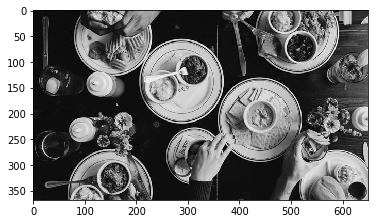

True

In [15]:
img = cv2.imread('test/foodies.jpg', cv2.IMREAD_GRAYSCALE) # change image name and predictions can be seen for individual images
img_size = 280
img.shape
plt.imshow(img,'gray')
plt.show()
cv2.imwrite("foodies1.jpg", img)


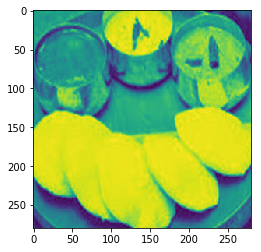

In [10]:
img_gray = cv2.resize(img,(img_size,img_size))
data = img_gray.reshape(1,img_size,img_size,1)
data.shape
plt.imshow(img_gray)
plt.show()



In [11]:
model_out=loaded_model.predict(data)

In [12]:
if np.argmax(model_out) == 0: str_label='samosa'
elif np.argmax(model_out) == 1: str_label='kachori'
elif np.argmax(model_out) == 2: str_label='aloo_paratha'
elif np.argmax(model_out) == 3: str_label='idli'
elif np.argmax(model_out) == 4: str_label='jalebi'
elif np.argmax(model_out) == 5: str_label='tea'
elif np.argmax(model_out) == 6: str_label='paneer_tikka'
elif np.argmax(model_out) == 7: str_label='dosa'
elif np.argmax(model_out) == 8: str_label='omlet'
elif np.argmax(model_out) == 9: str_label='poha'
print(str_label)

idli


In [7]:
model_out

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

# Batchwise predictions


In [8]:
TEST_DIR = 'test'
IMG_SIZE= 280

In [9]:
def label_img(img):
    word = img.split("(")[-2]
    if word=='samosa ': return 0
    elif word=='kachori ': return 1
    elif word=='aloo_paratha ': return 2
    elif word=='idli ': return 3
    elif word=='jalebi ': return 4
    elif word=='tea ': return 5
    elif word=='paneer_tikka ': return 6
    elif word=='dosa ': return 7
    elif word=='omlet ': return 8
    elif word=='poha ': return 9

In [10]:
# batchwise pridictions
def load_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),np.array(label)])
    shuffle(testing_data)
    np.save('test_data_k.npy', testing_data)
    return testing_data

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1425.18it/s]


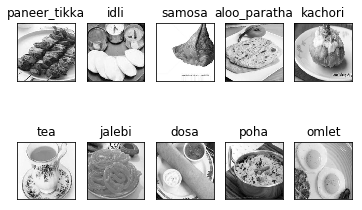

In [11]:
# batchwise prediction
test_data = load_test_data()

fig=plt.figure()

for num,data in enumerate(test_data[:10]):

    
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(2,5,num+1)
    orig = img_data
    data = img_data.reshape(1,IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = loaded_model.predict([data])[0]
    
    if np.argmax(model_out) == 0: str_label='samosa'
    elif np.argmax(model_out) == 1: str_label='kachori'
    elif np.argmax(model_out) == 2: str_label='aloo_paratha'
    elif np.argmax(model_out) == 3: str_label='idli'
    elif np.argmax(model_out) == 4: str_label='jalebi'
    elif np.argmax(model_out) == 5: str_label='tea'
    elif np.argmax(model_out) == 6: str_label='paneer_tikka'
    elif np.argmax(model_out) == 7: str_label='dosa'
    elif np.argmax(model_out) == 8: str_label='omlet'
    elif np.argmax(model_out) == 9: str_label='poha'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()